<a href="https://colab.research.google.com/github/ankitkumarhello20/sql-injection-dataset/blob/main/Sql_injection_detection_by_Machine_Learning_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Loading the data
url='https://raw.githubusercontent.com/ankitkumarhello20/sql-injection-dataset/main/sqlqueriesdata.csv'
data0 = pd.read_csv(url,encoding= 'unicode_escape')
data0.head()

,Query,Data,Singlequotes,Doublequotes,Punctuations,1-linecmt,Mulline-cmt,Spaces,Safekywrd,Harmflkywrd,...,Nulls,Hex-dec,Db_info,Roles,Ntwr_cmds,Lang_cmds,Alphabets,Digits,Spl_char,Label
0,SELECT contain ( s ) FROM hurt SELECT chair (...,1,0,0,4,0,0,12,3,0,...,0,0,0,0,52,2,34,0,0,0
1,SELECT tight FROM tears,1,0,0,0,0,0,4,1,0,...,0,0,0,0,24,1,20,0,0,0
2,SELECT * FROM inch,1,0,0,0,0,0,4,2,0,...,0,0,0,0,19,1,14,0,0,0
3,SELECT * FROM long WHERE contain NOT IN ( '...,1,6,0,10,0,0,13,3,0,...,0,0,0,0,75,1,46,0,6,0
4,SELECT COUNT ( ProductID ) FROM Products;,1,0,0,3,0,0,7,1,0,...,0,0,0,0,42,1,32,0,0,0


In [ ]:
data0.shape

(15800, 23)

In [ ]:
#Listing the features of the dataset
data0.columns

Index(['Query', 'Data', 'Singlequotes', 'Doublequotes', 'Punctuations',
       '1-linecmt', 'Mulline-cmt', 'Spaces', 'Safekywrd', 'Harmflkywrd',
       'Percentages', 'Log_oprtr', 'Operator', 'Nulls', 'Hex-dec', 'Db_info',
       'Roles', 'Ntwr_cmds', 'Lang_cmds', 'Alphabets', 'Digits', 'Spl_char',
       'Label'],
      dtype='object')

In [ ]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15800 entries, 0 to 15799
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Query         15800 non-null  object
 1   Data          15800 non-null  int64 
 2   Singlequotes  15800 non-null  int64 
 3   Doublequotes  15800 non-null  int64 
 4   Punctuations  15800 non-null  int64 
 5   1-linecmt     15800 non-null  int64 
 6   Mulline-cmt   15800 non-null  int64 
 7   Spaces        15800 non-null  int64 
 8   Safekywrd     15800 non-null  int64 
 9   Harmflkywrd   15800 non-null  int64 
 10  Percentages   15800 non-null  int64 
 11  Log_oprtr     15800 non-null  int64 
 12  Operator      15800 non-null  int64 
 13  Nulls         15800 non-null  int64 
 14  Hex-dec       15800 non-null  int64 
 15  Db_info       15800 non-null  int64 
 16  Roles         15800 non-null  int64 
 17  Ntwr_cmds     15800 non-null  int64 
 18  Lang_cmds     15800 non-null  int64 
 19  Alph

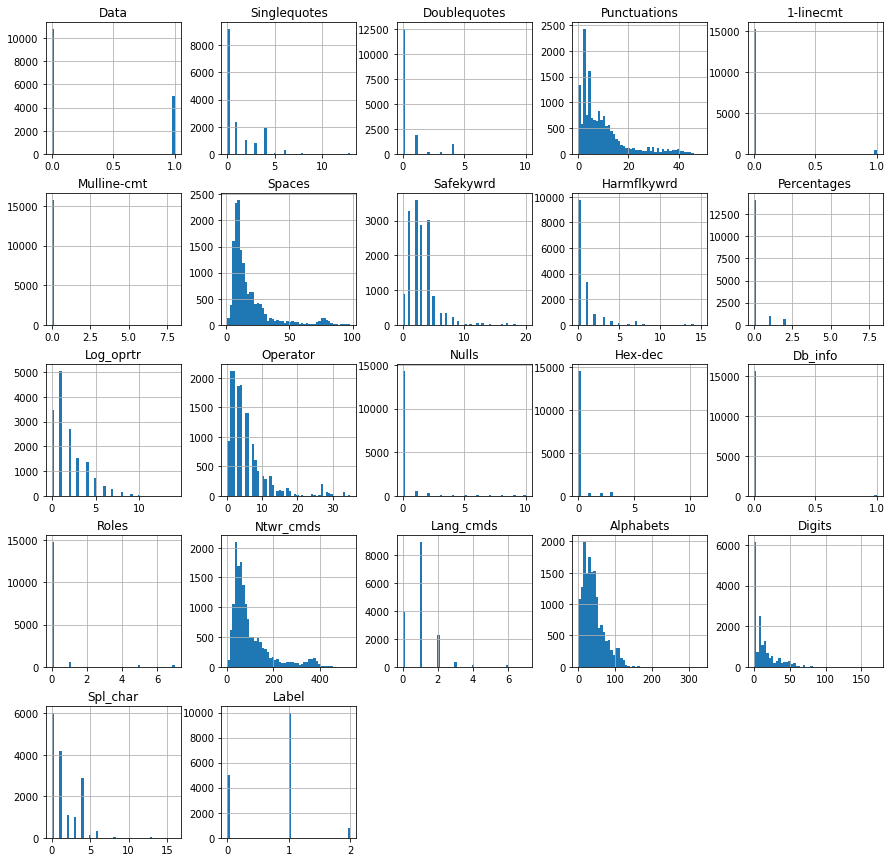

In [ ]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

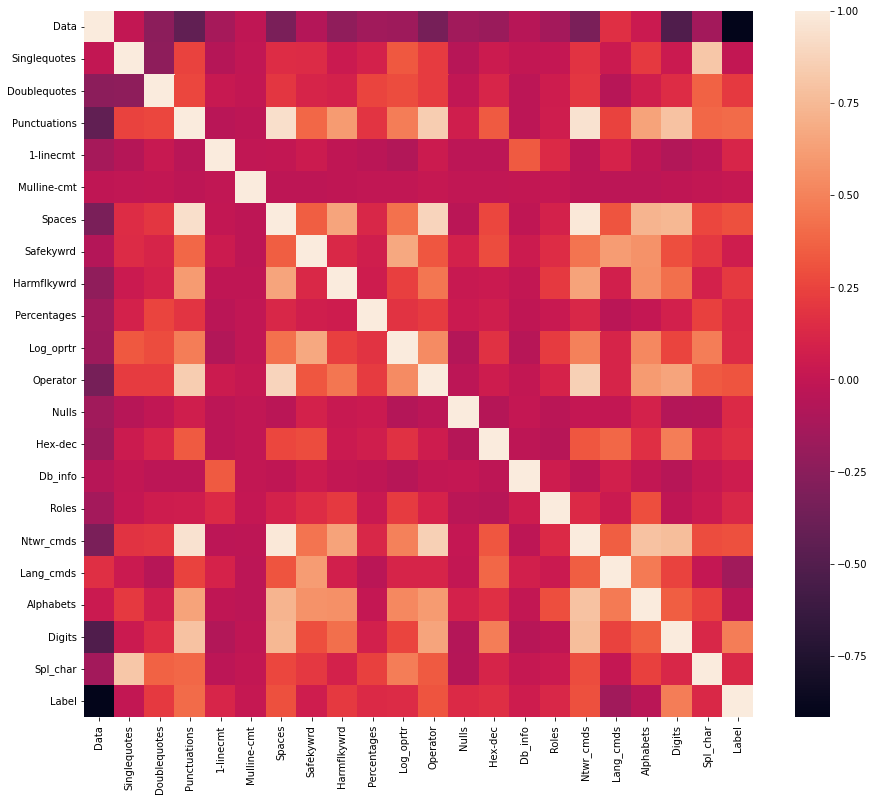

In [ ]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

In [ ]:
data0.describe()

,Data,Singlequotes,Doublequotes,Punctuations,1-linecmt,Mulline-cmt,Spaces,Safekywrd,Harmflkywrd,Percentages,...,Nulls,Hex-dec,Db_info,Roles,Ntwr_cmds,Lang_cmds,Alphabets,Digits,Spl_char,Label
count,15800.000000,15800.000000,15800.000000,15800.000000,15800.000000,15800.000000,15800.000000,15800.000000,15800.000000,15800.000000,...,15800.000000,15800.000000,15800.000000,15800.000000,15800.000000,15800.000000,15800.000000,15800.000000,15800.000000,15800.000000
mean,0.316456,1.110063,0.442025,9.354114,0.033418,0.001962,18.493291,2.940633,0.971519,0.149873,...,0.303797,0.157152,0.005823,0.184367,100.785063,1.001962,40.566519,12.934747,1.559367,0.734177
std,0.465108,1.720586,1.070787,9.836655,0.179730,0.079135,17.575674,2.307879,2.118658,0.466153,...,1.291438,0.603951,0.076087,0.944432,86.694091,0.863086,29.011966,15.489077,1.805329,0.544468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,45.000000,1.000000,18.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,12.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,69.000000,1.000000,35.000000,9.000000,1.000000,1.000000
75%,1.000000,2.000000,0.000000,12.000000,0.000000,0.000000,22.000000,4.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,124.000000,1.000000,54.000000,18.000000,3.000000,1.000000
max,1.000000,13.000000,10.000000,49.000000,1.000000,8.000000,98.000000,20.000000,15.000000,8.000000,...,10.000000,11.000000,1.000000,7.000000,530.000000,7.000000,333.000000,171.000000,16.000000,2.000000


In [ ]:
#Dropping the Domain column
data = data0.drop(['Query'], axis = 1).copy()
#checking the data for null or missing values
data.isnull().sum()

Data            0
Singlequotes    0
Doublequotes    0
Punctuations    0
1-linecmt       0
Mulline-cmt     0
Spaces          0
Safekywrd       0
Harmflkywrd     0
Percentages     0
Log_oprtr       0
Operator        0
Nulls           0
Hex-dec         0
Db_info         0
Roles           0
Ntwr_cmds       0
Lang_cmds       0
Alphabets       0
Digits          0
Spl_char        0
Label           0
dtype: int64

In [ ]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Data,Singlequotes,Doublequotes,Punctuations,1-linecmt,Mulline-cmt,Spaces,Safekywrd,Harmflkywrd,Percentages,...,Nulls,Hex-dec,Db_info,Roles,Ntwr_cmds,Lang_cmds,Alphabets,Digits,Spl_char,Label
0,1,0,0,0,0,0,7,5,0,0,...,0,0,0,0,38,1,30,0,0,0
1,1,0,0,2,0,0,9,6,0,0,...,0,0,0,0,41,1,30,0,0,0
2,1,0,0,3,0,0,11,1,0,0,...,0,0,0,0,60,1,43,0,0,0
3,1,0,0,1,0,0,9,1,2,0,...,0,0,0,0,53,1,41,0,0,0
4,1,4,0,8,0,0,10,2,0,0,...,0,0,0,0,69,1,34,16,4,0


In [ ]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((15800, 21), (15800,))

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((12640, 21), (3160, 21))

In [ ]:
#importing packages
from sklearn.metrics import accuracy_score
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [ ]:
# Decision Tree model 

from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

In [ ]:

#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.7f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.7f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.9513449
Decision Tree: Accuracy on test Data: 0.9414557


In [ ]:
# Storing the results:

#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [ ]:
# Performance Evaluation:

#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.7f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.7f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.9512658
Random forest: Accuracy on test Data: 0.9417722


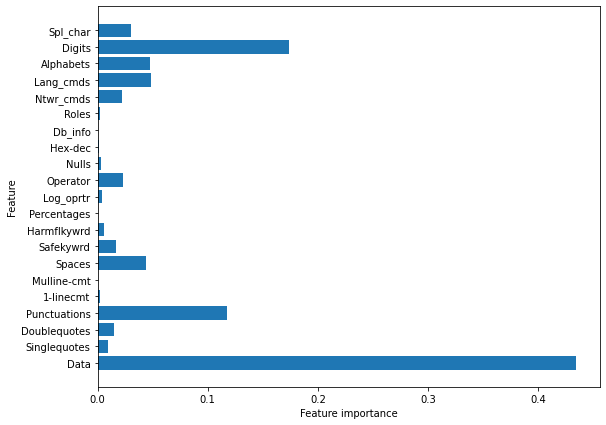

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

In [ ]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(learning_rate=0.4, max_depth=7, objective='multi:softprob')

In [ ]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [ ]:
# Performance Evaluation:

#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.7f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.7f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.9553006
XGBoost : Accuracy on test Data: 0.9237342


In [ ]:
# Storing the results:

#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

In [ ]:
#  Autoencoder Neural Network

#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [ ]:
#building autoencoder model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 21)]              0         
                                                                 
 dense_63 (Dense)            (None, 21)                462       
                                                                 
 dense_64 (Dense)            (None, 21)                462       
                                                                 
 dense_65 (Dense)            (None, 19)                418       
                                                                 
 dense_68 (Dense)            (None, 21)                420       
                                                                 
 dense_69 (Dense)            (None, 21)                462       
                                                                 
Total params: 2,224
Trainable params: 2,224
Non-trainable p

In [ ]:
#compiling the model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.3) 

Epoch 1/10
139/139 [==============================] - 1s 4ms/step - loss: -30.8271 - accuracy: 0.1044 - val_loss: -108.6347 - val_accuracy: 0.9974
Epoch 2/10
139/139 [==============================] - 0s 3ms/step - loss: -111.4973 - accuracy: 0.9365 - val_loss: -112.9422 - val_accuracy: 0.9989
Epoch 3/10
139/139 [==============================] - 0s 3ms/step - loss: -111.9809 - accuracy: 0.9998 - val_loss: -112.9956 - val_accuracy: 0.9997
Epoch 4/10
139/139 [==============================] - 0s 3ms/step - loss: -112.0525 - accuracy: 0.9995 - val_loss: -113.2207 - val_accuracy: 0.9992
Epoch 5/10
139/139 [==============================] - 0s 3ms/step - loss: -111.7682 - accuracy: 0.9999 - val_loss: -112.7599 - val_accuracy: 1.0000
Epoch 6/10
139/139 [==============================] - 1s 4ms/step - loss: -112.3166 - accuracy: 0.9998 - val_loss: -113.6308 - val_accuracy: 0.9992
Epoch 7/10
139/139 [==============================] - 0s 3ms/step - loss: -112.6733 - accuracy: 0.9998 - val_loss

In [ ]:
# Performance Evaluation:

acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.7f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.7f}' .format(acc_test_auto))

99/99 [==============================] - 0s 1ms/step - loss: -113.3883 - accuracy: 0.8873

Autoencoder: Accuracy on training Data: 0.8867880
Autoencoder: Accuracy on test Data: 0.8873418


In [ ]:
# Storing the results:

#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('AutoEncoder', acc_train_auto, acc_test_auto)

In [ ]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [ ]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [ ]:
# Performance Evaluation:

#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.7f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.7f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.9512658
SVM : Accuracy on test Data: 0.9417722


In [ ]:
# Storing the results:

#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

In [ ]:

svc=SVC(probability=True, kernel='linear')
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
Adaboost = AdaBoostClassifier(n_estimators=100,
                         learning_rate=0.9)
# Train Adaboost Classifer
Adaboost= Adaboost.fit(X_train, y_train)


In [ ]:

#Predict the response for test dataset
y_test_Adaboost = Adaboost.predict(X_test)
y_train_Adaboost = Adaboost.predict(X_train)

In [ ]:
# Performance Evaluation:

#computing the accuracy of the model performance
acc_train_Adaboost = accuracy_score(y_train,y_train_Adaboost)
acc_test_Adaboost = accuracy_score(y_test,y_test_Adaboost)

print("AdaBoost: Accuracy on training Data: {:.7f}".format(acc_train_Adaboost))
print("AdaBoost : Accuracy on test Data: {:.7f}".format(acc_test_Adaboost))

AdaBoost: Accuracy on training Data: 0.9511076
AdaBoost : Accuracy on test Data: 0.9414557


In [ ]:
# Storing the results:

#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Adaboost', acc_train_Adaboost, acc_test_Adaboost)

In [ ]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
#Predict the response for test dataset
y_test_lgbm = lgbm.predict(X_test)
y_train_lgbm = lgbm.predict(X_train)

In [ ]:
# Performance Evaluation:

#computing the accuracy of the model performance
acc_train_lgbm = accuracy_score(y_train,y_train_lgbm)
acc_test_lgbm = accuracy_score(y_test,y_test_lgbm)

print("lgbm: Accuracy on training Data: {:.7f}".format(acc_train_lgbm))
print("lgbm : Accuracy on test Data: {:.7f}".format(acc_test_lgbm))

lgbm: Accuracy on training Data: 0.9515032
lgbm : Accuracy on test Data: 0.9408228


In [ ]:
# Storing the results:

#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('lgbm', acc_train_lgbm, acc_test_lgbm)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# fit the model on the whole dataset
Gbm = GradientBoostingClassifier()
Gbm.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
#Predict the response for test dataset
y_test_Gbm = Gbm.predict(X_test)
y_train_Gbm = Gbm.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_Gbm = accuracy_score(y_train,y_train_Gbm)
acc_test_Gbm = accuracy_score(y_test,y_test_Gbm)

print("Gbm: Accuracy on training Data: {:.7f}".format(acc_train_Gbm))
print("Gbm : Accuracy on test Data: {:.7f}".format(acc_test_Gbm))

Gbm: Accuracy on training Data: 0.9515032
Gbm : Accuracy on test Data: 0.9408228


In [ ]:
# Storing the results:

#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Gbm', acc_train_Gbm, acc_test_Gbm)

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.951,0.941
1,Random Forest,0.951,0.942
2,XGBoost,0.955,0.924
3,AutoEncoder,0.887,0.887
4,SVM,0.951,0.942
5,Adaboost,0.951,0.941
6,lgbm,0.952,0.941
7,Gbm,0.952,0.941


In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
1,Random Forest,0.951,0.942
4,SVM,0.951,0.942
6,lgbm,0.952,0.941
7,Gbm,0.952,0.941
0,Decision Tree,0.951,0.941
5,Adaboost,0.951,0.941
2,XGBoost,0.955,0.924
3,AutoEncoder,0.887,0.887


In [ ]:
# save RandomForest model to file
import pickle
pickle.dump(forest, open("ForestClassifier.pickle.dat", "wb"))

In [ ]:
# load model from file
loaded_model = pickle.load(open("ForestClassifier.pickle.dat", "rb"))
loaded_model

RandomForestClassifier(max_depth=5)